# Breast Cancer Data Challange 

### The task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

In [2]:
% matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
import numpy as np
from patsy import dmatrices


In [3]:
bio_data = pd.read_csv("breastcancer.data.txt")
dfall = pd.read_csv("breastcancer.data.txt")
bio_data.head()

,group,id,diagnosis,thickness,size.unif,shape.unif,adhesion,epi,bare,bland,normal,mitoses
0,1,1000025,2,5,1,1,1,2,1,3,1,1
1,1,1002945,2,5,4,4,5,7,10,3,2,1
2,1,1015425,2,3,1,1,1,2,2,3,1,1
3,1,1016277,2,6,8,8,1,3,4,3,7,1
4,1,1017023,2,4,1,1,3,2,1,3,1,1


In [4]:
bio_data['ind']=bio_data.index
bio_data.head()

,group,id,diagnosis,thickness,size.unif,shape.unif,adhesion,epi,bare,bland,normal,mitoses,ind
0,1,1000025,2,5,1,1,1,2,1,3,1,1,0
1,1,1002945,2,5,4,4,5,7,10,3,2,1,1
2,1,1015425,2,3,1,1,1,2,2,3,1,1,2
3,1,1016277,2,6,8,8,1,3,4,3,7,1,3
4,1,1017023,2,4,1,1,3,2,1,3,1,1,4


In [5]:
bio_data.index=bio_data.diagnosis

#### General statistics of the dataset 

In [6]:
bio_data.groupby('diagnosis').describe()

adhesion        bare       bland         epi       group  \
diagnosis                                                                     
2         count  458.000000  458.000000  458.000000  458.000000  458.000000   
          mean     1.364629    1.305677    2.100437    2.120087    3.386463   
          std      0.996830    1.182666    1.080339    0.917130    2.719005   
          min      1.000000    0.000000    1.000000    1.000000    1.000000   
          25%      1.000000    1.000000    1.000000    2.000000    1.000000   
          50%      1.000000    1.000000    2.000000    2.000000    2.000000   
          75%      1.000000    1.000000    3.000000    2.000000    6.000000   
          max     10.000000   10.000000    7.000000   10.000000    8.000000   
4         count  241.000000  241.000000  241.000000  241.000000  241.000000   
          mean     5.547718    7.564315    5.979253    5.298755    2.307054   
          std      3.210465    3.180182    2.273852    2.451606    2.301519   
          min      1.000000    0.000000    1.000000    1.000000    1.000000   
          25%      3.000000    5.000000    4.000000    3.000000    1.000000   
          50%      5.000000   10.000000    7.000000    5.000000    1.000000   
          75%      8.000000   10.000000    7.000000    6.000000    3.000000   
          max     10.000000   10.000000   10.000000   10.000000    8.000000   

                              id         ind     mitoses      normal  \
diagnosis                                                              
2         count       458.000000  458.000000  458.000000  458.000000   
          mean    1107590.563319  377.631004    1.063319    1.290393   
          std      723431.757966  201.830272    0.501995    1.058856   
          min       61634.000000    0.000000    1.000000    1.000000   
          25%     1002614.250000  198.250000    1.000000    1.000000   
          50%     1180170.500000  400.000000    1.000000    1.000000   
          75%     1256870.500000  547.750000    1.000000    1.000000   
          max    13454352.000000  695.000000    8.000000    9.000000   
4         count       241.000000  241.000000  241.000000  241.000000   
          mean    1003504.925311  294.589212    2.589212    5.863071   
          std      322232.308608  191.005217    2.557939    3.350672   
          min       63375.000000    5.000000    1.000000    1.000000   
          25%      832226.000000  128.000000    1.000000    3.000000   
          50%     1126417.000000  267.000000    1.000000    6.000000   
          75%     1221863.000000  440.000000    3.000000   10.000000   
          max     1371026.000000  698.000000   10.000000   10.000000   

                 shape.unif   size.unif   thickness  
diagnosis                                            
2         count  458.000000  458.000000  458.000000  
          mean     1.443231    1.325328    2.956332  
          std      0.997836    0.907694    1.674318  
          min      1.000000    1.000000    1.000000  
          25%      1.000000    1.000000    1.000000  
          50%      1.000000    1.000000    3.000000  
          75%      1.000000    1.000000    4.000000  
          max      8.000000    9.000000    8.000000  
4         count  241.000000  241.000000  241.000000  
          mean     6.560166    6.572614    7.195021  
          std      2.562045    2.719512    2.428849  
          min      1.000000    1.000000    1.000000  
          25%      4.000000    4.000000    5.000000  
          50%      6.000000    6.000000    8.000000  
          75%      9.000000   10.000000   10.000000  
          max     10.000000   10.000000   10.000000

In [7]:
#bio_data.boxplot(column=['shape.unif', 'size.unif'], by = 'diagnosis')
#bio_data.boxplot(column='size.unif', by= 'diagnosis')

In [8]:
#temp3 = pd.crosstab([bio_data['shape.unif'], bio_data['size.unif']], bio_data['diagnosis'].astype(bool))
#temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [9]:
print bio_data.columns
bio_data[['adhesion','epi', 'bare', 'bland']].head()

Index([u'group', u'id', u'diagnosis', u'thickness', u'size.unif',
       u'shape.unif', u'adhesion', u'epi', u'bare', u'bland', u'normal',
       u'mitoses', u'ind'],
      dtype='object')


,adhesion,epi,bare,bland
diagnosis,,,,
2,1,2,1,3
2,5,7,10,3
2,1,2,2,3
2,1,3,4,3
2,3,2,1,3


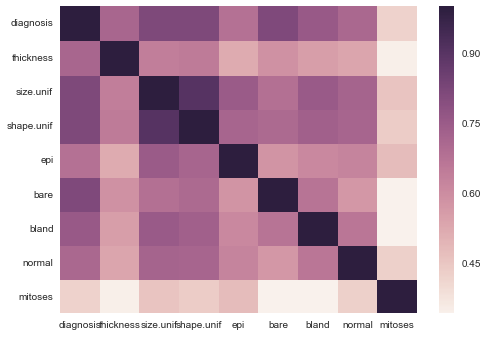

In [10]:
featu=bio_data[['diagnosis','thickness','size.unif','shape.unif','epi','bare','bland','normal','mitoses']]
ax = sns.heatmap(featu.corr())

#### We remove the diagnosis feature from the dataset and consider the rest as our features 

In [11]:
#featu.groupby('diagnosis').hist()
exclude_diagnosis  = featu.ix[:, featu.columns != 'diagnosis']
exclude_diagnosis.head()

,thickness,size.unif,shape.unif,epi,bare,bland,normal,mitoses
diagnosis,,,,,,,,
2,5,1,1,2,1,3,1,1
2,5,4,4,7,10,3,2,1
2,3,1,1,2,2,3,1,1
2,6,8,8,3,4,3,7,1
2,4,1,1,2,1,3,1,1


In [72]:
#cancer = featu[['thickness', 'size.unif', 'shape.unif']].hist()
#featu['thickness'].hist()

#### we will split the data to training and test dataset 

In [12]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(exclude_diagnosis,featu.diagnosis, test_size=0.4, random_state=0)

####  Fit training set using the logistic regression 

In [32]:
Logistic_model = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=0.01)
logistic_fit  = Logistic_model.fit(X_train, Y_train)
logistic_fit.score(X_test, Y_test)

0.95357142857142863

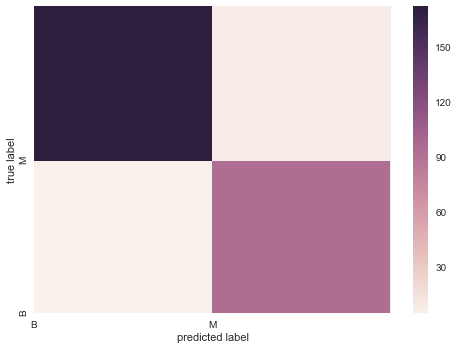

In [73]:
predicted_Y=Logistic_model.predict(X_test)
test_results = confusion_matrix(Y_test.values, predicted_Y,labels=[2,4])
sns.heatmap(test_results)
no_tickers = np.arange(2)
plt.xticks(no_tickers, ['B','M'])
plt.yticks(no_tickers, ['B','M'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#### The holdout method is sensitive to the choosen split of the data, more rubost method is the k-fold method. k-fold method split the training set to k sets and train the model in each set.

In [15]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', linear_model.LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, Y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, Y_test))

Test Accuracy: 0.954


Using the pile_lr pipeline, we ensured that the
samples were scaled properly (for instance, standardized) in each iteration. We
then used the test indices to calculate the accuracy score of the model, which
we collected in the scores list to calculate the average accuracy and the standard
deviation of the estimate.

From sklearn we import cross_val_score, which is a k-fold cross-validation
scorer, which allows us to evaluate our model using stratified k-fold
cross-validation

In [16]:
kfold = StratifiedKFold(Y_train, n_folds=10,random_state=1)
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=Y_train,
                         cv=10)
print('CV accuracy scores: %s' % scores)
print "========================================="
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))
print "========================================="

CV accuracy scores: [ 0.95348837  1.          0.97619048  0.97619048  0.97619048  0.97619048
  0.95238095  0.95238095  1.          0.95121951]
CV accuracy: 0.971 +/- 0.018


### Debugging algorithms with learning and validation curves

In [18]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=Y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10)

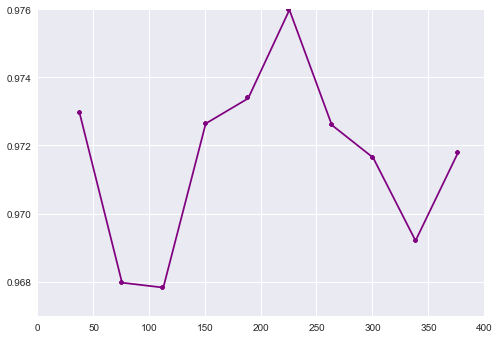

In [19]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='purple', marker='o', markersize=5,label='training accuracy')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


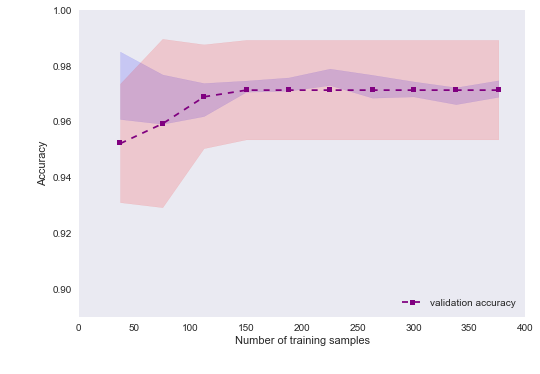

In [20]:
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='purple', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.89, 1.0])
plt.show()

In [21]:
from sklearn import cross_validation 
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

### Tuning hyperparameters via grid search

In [22]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978520286396
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [23]:
clf = gs.best_estimator_
clf.fit(X_train, Y_train)
print('Test accuracy: %.3f' % clf.score(X_test, Y_test))

Test accuracy: 0.954


### Perform nested cross-validation

In [24]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=5)
scores = cross_val_score(gs, X_train, Y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.009


### Preform decision tree classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=5)
scores = cross_val_score(gs,
                         X_train,
                         Y_train,
                         scoring='accuracy',
                         cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.947 +/- 0.017


### Precision (PRE) and recall (REC) are performance metrics

#### Precision PRE = TP/(TP + FP)

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision (benign): %.3f' % precision_score(y_true=Y_test, y_pred=predicted_Y, pos_label=2))
print('Precision (malignant): %.3f' % precision_score(y_true=Y_test, y_pred=predicted_Y, pos_label=4))

Precision (benign): 0.972
Precision (malignant): 0.922


#### Recall = TPR = TP/P = TP/(FN + TP)

In [53]:
print('Recall (benign): %.3f' % recall_score(y_true=Y_test, y_pred=predicted_Y, pos_label=2))
print('Recall(malignant): %.3f' % recall_score(y_true=Y_test, y_pred=predicted_Y, pos_label=4))

Recall (benign): 0.956
Recall(malignant): 0.950


#### F1-score, combination of precision and recall 

In [54]:
print('F1 (benign): %.3f' % f1_score(y_true=Y_test, y_pred=predicted_Y, pos_label=4))
print('F1 (malignant): %.3f' % f1_score(y_true=Y_test, y_pred=predicted_Y, pos_label=2))

F1 (benign): 0.936
F1 (malignant): 0.964


In [55]:
bio_data.rename(columns={'size.unif':'size_unif'}, inplace=True)
bio_data.rename(columns={'shape.unif':'shape_unif'}, inplace=True)
y, X = dmatrices('diagnosis ~ thickness + size_unif + shape_unif  + adhesion + epi + bare + bland +normal + mitoses',
                   bio_data, return_type="dataframe")

#### Plotting ROC AUC

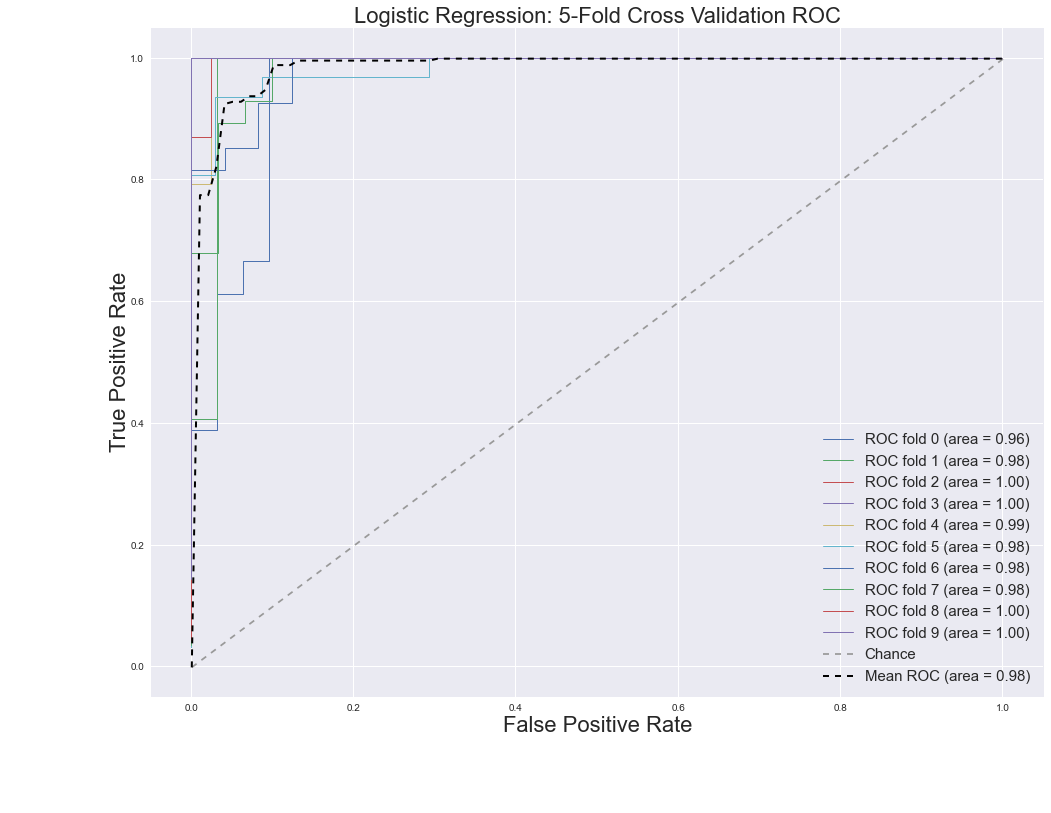

In [56]:
# Plotting ROC AUC
from sklearn.metrics import roc_curve, auc


X = StandardScaler().fit_transform(X)
y[y==2]=0
y[y==4]=1

y = np.ravel(y)
#Logistic_model
#kfold
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

plt.figure(figsize=(16,12))

for i, (train, test) in enumerate(kfold):
    probas_ = pipe_lr.fit(X[train[0]:train[-1]], y[train[0]:train[-1]]).predict_proba(X[test[0]:test[-1]])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test[0]:test[-1]], probas_[:, 1])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Chance')

mean_tpr /= len(kfold)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
plt.title('Logistic Regression: 5-Fold Cross Validation ROC', fontsize=22)
plt.legend(loc="lower right", prop={'size':15})
plt.show()